In [1]:
import random
from random import choice
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from scipy import stats
from sklearn import linear_model
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
boston = datasets.load_boston()
type(boston)

sklearn.utils.Bunch

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
class Bunch:
    def __init__(self,**kwargs):
        self.__dict__=kwargs

In [5]:
b = Bunch(x=0,y=1)
b

In [6]:
b.x=0
b.y=1

In [7]:
class A:
    pass

In [8]:
a=A()
a.x='Hola'
a.y=1

In [9]:
a.__dict__

{'x': 'Hola', 'y': 1}

In [10]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [11]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [12]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [13]:
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [14]:
boston_df = pd.DataFrame(data=boston.data,columns=boston.feature_names)

In [15]:
boston_df['MEDV']=boston.target

In [16]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [17]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [18]:
linear_model.LinearRegression()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [19]:
regresor = linear_model.LinearRegression()

In [20]:
regresor.fit(boston_df.drop(columns=['MEDV']).values,boston_df['MEDV'].values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [21]:
regresor.intercept_

36.45948838509015

In [22]:
regresor.coef_

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [23]:
dict(zip(boston.feature_names,regresor.coef_))

{'CRIM': -0.10801135783679423,
 'ZN': 0.04642045836688117,
 'INDUS': 0.020558626367069507,
 'CHAS': 2.6867338193449415,
 'NOX': -17.766611228299926,
 'RM': 3.809865206809223,
 'AGE': 0.0006922246403368467,
 'DIS': -1.4755668456002524,
 'RAD': 0.30604947898516904,
 'TAX': -0.012334593916573685,
 'PTRATIO': -0.9527472317072904,
 'B': 0.009311683273793581,
 'LSTAT': -0.5247583778554906}

In [24]:
regresorz = linear_model.LinearRegression(normalize=True)

In [25]:
regresorz.fit(boston_df.drop(columns=['MEDV']).values,boston_df['MEDV'].values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [26]:
dict(zip(boston.feature_names,regresor.coef_))

{'CRIM': -0.10801135783679423,
 'ZN': 0.04642045836688117,
 'INDUS': 0.020558626367069507,
 'CHAS': 2.6867338193449415,
 'NOX': -17.766611228299926,
 'RM': 3.809865206809223,
 'AGE': 0.0006922246403368467,
 'DIS': -1.4755668456002524,
 'RAD': 0.30604947898516904,
 'TAX': -0.012334593916573685,
 'PTRATIO': -0.9527472317072904,
 'B': 0.009311683273793581,
 'LSTAT': -0.5247583778554906}

In [27]:
X_train,X_test,y_train,y_test=model_selection.train_test_split(boston.data,boston.target,test_size=.2)

In [28]:
regresor=linear_model.LinearRegression(normalize=True)
regresor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [29]:
dict(zip(boston.feature_names,regresor.coef_))

{'CRIM': -0.10207764472717375,
 'ZN': 0.05896141461536478,
 'INDUS': 0.032730471798385,
 'CHAS': 2.0239366350534764,
 'NOX': -15.463478134723864,
 'RM': 4.2717700028146695,
 'AGE': -0.017236185568759037,
 'DIS': -1.5110621212312427,
 'RAD': 0.29095342808988267,
 'TAX': -0.013721229712188148,
 'PTRATIO': -0.94239469962547,
 'B': 0.010322199974390399,
 'LSTAT': -0.4408170389104112}

In [30]:
y_pred=regresor.predict(X_test)
l=metrics.mean_squared_error(y_test,y_pred)
l**0.5

5.425219919421359

In [31]:
boston_df['MEDV'].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

In [152]:
tabla = pd.read_csv('Datos/TR_PERSONA17.CSV',encoding='latin1')
tabla.head()

,ID_VIV,ID_PERSONA,ENT,NOM_ENT,MUN,NOM_MUN,LOC50K,NOM_LOC,COBERTURA,ESTRATO,...,HIJOS_NAC_VIVOS,HIJOS_FALLECIDOS,HIJOS_SOBREVIV,FECHA_NAC_M,FECHA_NAC_A,SOBREVIVENCIA,EDAD_MORIR_D,EDAD_MORIR_M,EDAD_MORIR_A,TAMLOC
0,170010000001,17001000000101,17,Morelos,1,Amacuzac,0,Localidad de menos de 50 mil habitantes,2,17-001-08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
1,170010000002,17001000000201,17,Morelos,1,Amacuzac,0,Localidad de menos de 50 mil habitantes,2,17-001-06,...,7.0,0.0,7.0,8.0,1978.0,1.0,NaN,NaN,NaN,1
2,170010000003,17001000000303,17,Morelos,1,Amacuzac,0,Localidad de menos de 50 mil habitantes,2,17-001-08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
3,170010000003,17001000000301,17,Morelos,1,Amacuzac,0,Localidad de menos de 50 mil habitantes,2,17-001-08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
4,170010000003,17001000000302,17,Morelos,1,Amacuzac,0,Localidad de menos de 50 mil habitantes,2,17-001-08,...,1.0,0.0,1.0,10.0,2012.0,1.0,NaN,NaN,NaN,2


In [153]:
tabla.columns

Index(['ID_VIV', 'ID_PERSONA', 'ENT', 'NOM_ENT', 'MUN', 'NOM_MUN', 'LOC50K',
       'NOM_LOC', 'COBERTURA', 'ESTRATO', 'UPM', 'FACTOR', 'NUMPER', 'SEXO',
       'EDAD', 'PARENT', 'PARENT_OTRO_C', 'IDENT_MADRE', 'IDENT_PADRE',
       'SERSALUD', 'AFRODES', 'ACTA_NAC', 'DHSERSAL1', 'DHSERSAL2',
       'PERTE_INDIGENA', 'ENT_PAIS_NAC', 'NACIONALIDAD', 'HLENGUA',
       'QDIALECT_C', 'QDIALECT_INALI', 'HESPANOL', 'ELENGUA', 'ASISTEN',
       'MUN_ASI', 'NOM_MUN_ASI', 'ENT_PAIS_ASI', 'TIE_TRASLADO_ESCU',
       'MED_TRASLADO_ESC1', 'MED_TRASLADO_ESC2', 'MED_TRASLADO_ESC3',
       'ESCOLARI', 'NIVACAD', 'ALFABET', 'ESCOACUM', 'MUN_RES10',
       'NOM_MUN_RES10', 'ENT_PAIS_RES10', 'SITUA_CONYUGAL', 'IDENT_PAREJA',
       'CONACT', 'OCUPACION_C', 'SITUACION_TRAB', 'AGUINALDO', 'VACACIONES',
       'SERVICIO_MEDICO', 'UTILIDADES', 'INCAP_SUELDO', 'SAR_AFORE',
       'CREDITO_VIVIENDA', 'INGTRMEN', 'ACTIVIDADES_C', 'MUN_TRAB',
       'NOM_MUN_TRAB', 'ENT_PAIS_TRAB', 'TIE_TRASLADO_TRAB',
       '

In [154]:
tabla.describe()

,ID_VIV,ID_PERSONA,ENT,MUN,LOC50K,COBERTURA,UPM,FACTOR,NUMPER,SEXO,...,HIJOS_NAC_VIVOS,HIJOS_FALLECIDOS,HIJOS_SOBREVIV,FECHA_NAC_M,FECHA_NAC_A,SOBREVIVENCIA,EDAD_MORIR_D,EDAD_MORIR_M,EDAD_MORIR_A,TAMLOC
count,3.689760e+05,3.689760e+05,368976.0,368976.000000,368976.000000,368976.0,368976.000000,368976.000000,368976.000000,368976.000000,...,150724.000000,104844.000000,104844.000000,104823.000000,104823.000000,104823.000000,740.000000,321.000000,624.000000,368976.000000
mean,1.701606e+11,1.701606e+13,17.0,16.056413,0.157989,2.0,141280.611357,5.159715,2.840244,2.027102,...,4.316068,0.308439,3.163538,8.647463,2133.277267,1.063135,39.366216,8.520249,19.394231,2.333545
std,9.396513e+07,9.396513e+09,0.0,9.396538,0.364731,0.0,1229.672670,7.084663,1.810864,0.999634,...,13.805000,2.986184,3.454714,14.282695,1029.455815,0.555158,45.239159,18.668499,14.581977,1.272610
min,1.700100e+11,1.700100e+13,17.0,1.000000,0.000000,2.0,139161.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,1937.000000,1.000000,0.000000,1.000000,1.000000,1.000000
25%,1.700700e+11,1.700700e+13,17.0,7.000000,0.000000,2.0,140200.000000,2.000000,1.000000,1.000000,...,0.000000,0.000000,2.000000,4.000000,1990.000000,1.000000,1.000000,2.000000,5.000000,1.000000
50%,1.701600e+11,1.701600e+13,17.0,16.000000,0.000000,2.0,141261.000000,3.000000,2.000000,3.000000,...,2.000000,0.000000,3.000000,7.000000,2002.000000,1.000000,10.500000,4.000000,19.000000,2.000000
75%,1.702400e+11,1.702400e+13,17.0,24.000000,0.000000,2.0,142326.000000,6.000000,4.000000,3.000000,...,3.000000,0.000000,4.000000,10.000000,2010.000000,1.000000,99.000000,8.000000,30.000000,3.000000
max,1.703300e+11,1.703300e+13,17.0,33.000000,1.000000,2.0,143433.000000,396.000000,30.000000,3.000000,...,99.000000,99.000000,99.000000,99.000000,9999.000000,9.000000,99.000000,98.000000,72.000000,5.000000


In [85]:
tabla_pr = tabla[['SEXO','EDAD','INGTRMEN','ESCOACUM']]
tabla_pr = tabla_pr.dropna()

In [86]:
tabla_pr.replace({'SEXO' : 3}, 0, inplace=True)
tabla_pr.head()

,SEXO,EDAD,INGTRMEN,ESCOACUM
0,1,30,10000.0,16.0
3,1,23,4286.0,9.0
4,0,24,4286.0,6.0
9,0,47,12857.0,9.0
11,1,41,857.0,9.0


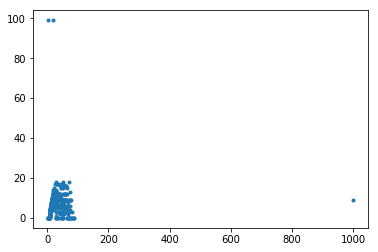

In [87]:
muestra = tabla.sample(400)
plt.plot(muestra['EDAD'], muestra['ESCOACUM'], marker='.', linestyle='none')

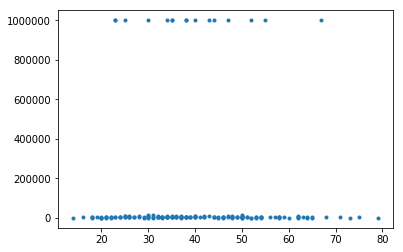

In [88]:
muestra = tabla.sample(400)
plt.plot(muestra['EDAD'], muestra['INGTRMEN'], marker='.', linestyle='none')

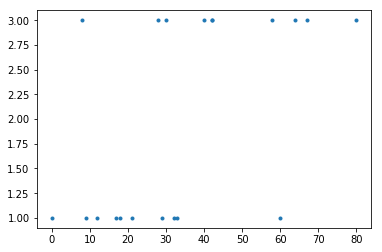

In [89]:
muestra = tabla.sample(20)
plt.plot(muestra['EDAD'], muestra['SEXO'], marker='.', linestyle='none')

In [90]:
tabla_pr1= tabla_pr[(tabla_pr['INGTRMEN']>0)&(tabla_pr['EDAD']<=100)
                    &(tabla_pr['INGTRMEN']<999_999)&(tabla_pr['ESCOACUM']>0)
                    &(tabla_pr['ESCOACUM']<99)]

In [91]:
tabla_pr1.describe()

,SEXO,EDAD,INGTRMEN,ESCOACUM
count,120503.000000,120503.000000,120503.000000,120503.000000
mean,0.639461,37.732480,4899.306109,9.734961
std,0.480159,13.498149,5746.262155,3.930578
min,0.000000,12.000000,8.000000,1.000000
25%,0.000000,27.000000,2571.000000,6.000000
50%,1.000000,36.000000,4000.000000,9.000000
75%,1.000000,47.000000,5800.000000,12.000000
max,1.000000,99.000000,999998.000000,24.000000


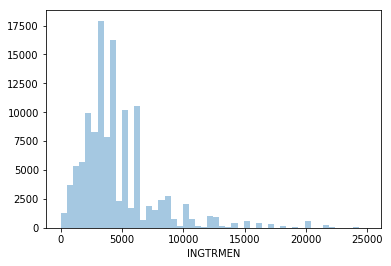

In [92]:
sns.distplot(tabla_pr1['INGTRMEN'][tabla_pr1['INGTRMEN']<25000],kde=False)

In [93]:
tabla_pr1['LOGINGTRMEN']=np.log10(tabla_pr1['INGTRMEN'])
tabla_pr1.LOGINGTRMEN.describe()

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


count    120503.000000
mean          3.579215
std           0.307518
min           0.903090
25%           3.410102
50%           3.602060
75%           3.763428
max           5.999999
Name: LOGINGTRMEN, dtype: float64

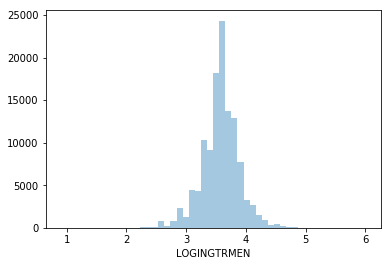

In [94]:
sns.distplot(tabla_pr1.LOGINGTRMEN,kde=False)

C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


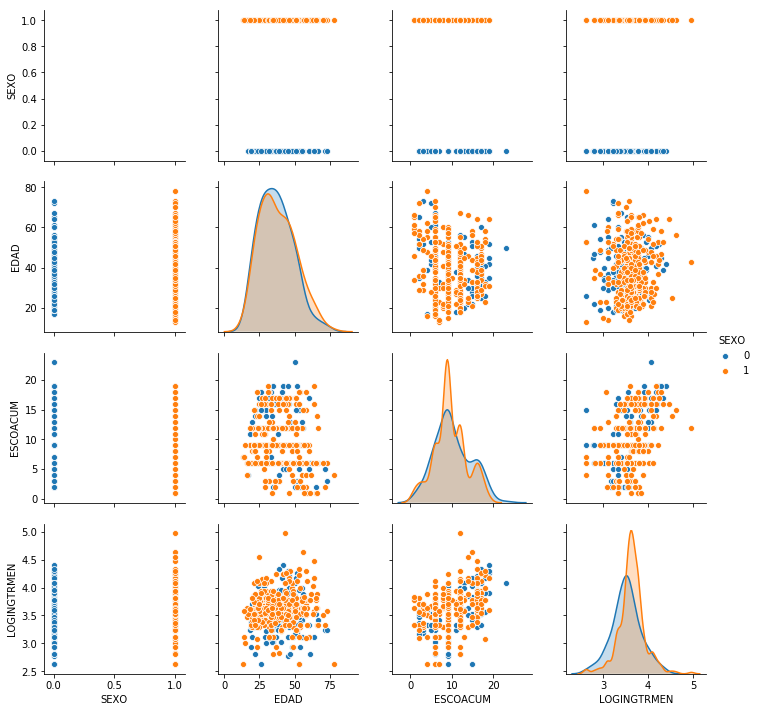

In [95]:
muestra=tabla_pr1.sample(500).drop(columns='INGTRMEN')
sns.pairplot(muestra,hue='SEXO')

In [46]:
muestra.corr()

,SEXO,EDAD,ESCOACUM,LOGINGTRMEN
SEXO,1.000000,0.004414,-0.049254,0.189677
EDAD,0.004414,1.000000,-0.186203,0.041184
ESCOACUM,-0.049254,-0.186203,1.000000,0.383603
LOGINGTRMEN,0.189677,0.041184,0.383603,1.000000


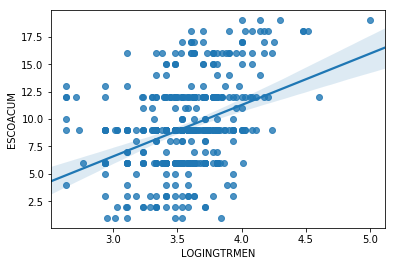

In [47]:
sns.regplot(muestra['LOGINGTRMEN'],muestra['ESCOACUM'])

# Linear Regresion

In [48]:
#muestra.drop(['SEXO'], axis=1)
#tabla_pr1.drop(['SEXO'], axis=1)
regresor = linear_model.LinearRegression(normalize=True)

In [49]:
regresor.fit(muestra.drop(columns=['LOGINGTRMEN']).values,muestra['LOGINGTRMEN'].values)
dict(zip(muestra.columns,regresor.coef_))

{'SEXO': 0.1383606452681841,
 'EDAD': 0.002706909527555865,
 'ESCOACUM': 0.03409781401631589}

In [50]:
10**regresor.intercept_

1150.5523671683056

In [51]:
X_train,X_test,y_train,y_test=model_selection.train_test_split(muestra.drop(['LOGINGTRMEN'], axis=1),muestra['LOGINGTX_train,X_test,y_train,y_test=model_selection.train_test_split(muestra.drop(['LOGINGTRMEN'], axis=1),muestra['LOGINGTRMEN'],test_size=.2)RMEN'],test_size=.2)

In [52]:
y_pred = regresor.predict(X_test)
l = metrics.mean_squared_error(y_test,y_pred)
l**0.5

0.23097341674449576

In [53]:
regresor=linear_model.LinearRegression()
regresor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [54]:
y_pred=regresor.predict(X_test)
l=metrics.mean_squared_error(y_test,y_pred)
l

0.055025781711998734

In [55]:
regresor=linear_model.LinearRegression(normalize=True)

In [56]:
X_train,X_test,y_train,y_test=model_selection.train_test_split(tabla_pr1.drop(['INGTRMEN','LOGINGTRMEN'], axis=1),tabla_pr1['LOGINGTRMEN'],test_size=.2)

In [57]:
?model_selection.train_test_split

Signature: model_selection.train_test_split(*arrays, **options)
Docstring:
Split arrays or matrices into random train and test subsets

Quick utility that wraps input validation and
``next(ShuffleSplit().split(X, y))`` and application to input data
into a single call for splitting (and optionally subsampling) data in a
oneliner.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
*arrays : sequence of indexables with same length / shape[0]
    Allowed inputs are lists, numpy arrays, scipy-sparse
    matrices or pandas dataframes.

test_size : float, int or None, optional (default=0.25)
    If float, should be between 0.0 and 1.0 and represent the proportion
    of the dataset to include in the test split. If int, represents the
    absolute number of test samples. If None, the value is set to the
    complement of the train size. By default, the value is set to 0.25.
    The default will change in version 0.21. It will remain 0.25 only
    if ``train_size`` i

In [58]:
regresor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [59]:
regresor.intercept_

3.077063376928816

In [60]:
y_pred = regresor.predict(X_test)
l = metrics.mean_squared_error(y_test,y_pred)
l

0.0758202167133179

In [61]:
X_train,X_test,y_train,y_test=model_selection.train_test_split(boston.data,boston.target,test_size=.2)

In [62]:
regresor=linear_model.LinearRegression(normalize=True)
regresor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [63]:
dict(zip(boston.feature_names,regresor.coef_))

{'CRIM': -0.08941485834943486,
 'ZN': 0.04099864746103197,
 'INDUS': 0.02745175162766506,
 'CHAS': 3.405771513733472,
 'NOX': -18.86930797781269,
 'RM': 3.273187681326862,
 'AGE': 0.011883206582866703,
 'DIS': -1.392000955497983,
 'RAD': 0.3760582968403584,
 'TAX': -0.01559033754378598,
 'PTRATIO': -0.9939400877764016,
 'B': 0.008468321938483167,
 'LSTAT': -0.5800908282901946}

In [64]:
y_pred=regresor.predict(X_test)
l=metrics.mean_squared_error(y_test,y_pred)
l**0.5

4.0261404048254255

# Regresion[lineal] Lasso

In [65]:
regresor = linear_model.Lasso(normalize=True,alpha=2)

In [66]:
regresor.fit(muestra.drop(columns=['LOGINGTRMEN']).values,muestra['LOGINGTRMEN'].values)
dict(zip(muestra.columns,regresor.coef_))

{'SEXO': 0.0, 'EDAD': 0.0, 'ESCOACUM': 0.0}

In [67]:
10**regresor.intercept_

3723.0547158511376

In [68]:
X_train,X_test,y_train,y_test=model_selection.train_test_split(tabla_pr1.drop(['INGTRMEN','LOGINGTRMEN'], axis=1),tabla_pr1['LOGINGTRMEN'],test_size=.2)

In [69]:
regresor.fit(X_train,y_train)
dict(zip(tabla_pr1.columns,regresor.coef_))

{'SEXO': 0.0, 'EDAD': 0.0, 'INGTRMEN': 0.0}

In [70]:
regresor.fit(X_train,y_train)

Lasso(alpha=2, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True,
   positive=False, precompute=False, random_state=None, selection='cyclic',
   tol=0.0001, warm_start=False)

In [71]:
regresor.intercept_

3.5784430055631566

In [72]:
y_pred = regresor.predict(X_test)
l = metrics.mean_squared_error(y_test,y_pred)
l**0.5

0.30593263414379596

In [73]:
X_train,X_test,y_train,y_test=model_selection.train_test_split(boston.data,boston.target,test_size=.2)

In [74]:
regresorz=linear_model.Lasso(normalize=True,alpha=0.1)
regresorz.fit(X_train,y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [75]:
dict(zip(boston.feature_names,regresorz.coef_))

{'CRIM': -0.0,
 'ZN': 0.0,
 'INDUS': -0.0,
 'CHAS': 0.0,
 'NOX': -0.0,
 'RM': 2.5170073975901164,
 'AGE': -0.0,
 'DIS': 0.0,
 'RAD': -0.0,
 'TAX': -0.0,
 'PTRATIO': -0.24461010751839465,
 'B': 0.0,
 'LSTAT': -0.45257569544629805}

In [76]:
regresor.intercept_

3.5784430055631566

In [77]:
y_pred=regresorz.predict(X_test)
l=metrics.mean_squared_error(y_test,y_pred)
l**0.5

6.903064163632593

# Regresion[lineal] Ridge

In [157]:
regresor = linear_model.Ridge(normalize=True)

In [158]:
regresor.fit(muestra.drop(columns=['LOGINGTRMEN']).values,muestra['LOGINGTRMEN'].values)
dict(zip(muestra.columns,regresor.coef_))

{'SEXO': 0.061729637877860996,
 'EDAD': 0.0010789590982884835,
 'ESCOACUM': 0.015564672127877502}

In [159]:
regresor.coef_

array([0.06172964, 0.00107896, 0.01556467])

In [80]:
10**regresor.intercept_

2205.045401445292

In [83]:
tabla_pr1.head()

,SEXO,EDAD,INGTRMEN,ESCOACUM,LOGINGTRMEN
0,1,30,10000.0,16.0,4.000000
3,1,23,4286.0,9.0,3.632052
4,0,24,4286.0,6.0,3.632052
9,0,47,12857.0,9.0,4.109140
11,1,41,857.0,9.0,2.932981


In [101]:
X_train,X_test,y_train,y_test=model_selection.train_test_split(tabla_pr1.drop(['INGTRMEN','LOGINGTRMEN'],axis=1),tabla_pr1['LOGINGTRMEN'],test_size=.2)

In [102]:
regresor.fit(X_train,y_train)
dict(zip(tabla_pr1.drop(['INGTRMEN','LOGINGTRMEN'],axis=1).columns,regresor.coef_))

{'SEXO': 0.06102161609164405,
 'EDAD': 0.0007650496492830214,
 'ESCOACUM': 0.01552821591018221}

In [103]:
regresor.fit(X_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [104]:
regresor.intercept_

3.3595354224770766

In [105]:
y_pred = regresor.predict(X_test)
l = metrics.mean_squared_error(y_test,y_pred)
l**0.5

0.2824654028106072

In [106]:
X_train,X_test,y_train,y_test=model_selection.train_test_split(boston.data,boston.target,test_size=.2)

In [147]:
regresorz=linear_model.Ridge(normalize=True,alpha=0.11)
regresorz.fit(X_train,y_train)

Ridge(alpha=0.11, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [148]:
dict(zip(boston.feature_names,regresorz.coef_))

{'CRIM': -0.07356501847709257,
 'ZN': 0.024758781477168694,
 'INDUS': -0.08051033576965957,
 'CHAS': 3.7503072758305054,
 'NOX': -9.936107648804137,
 'RM': 3.790417369524271,
 'AGE': -0.004082120551595782,
 'DIS': -0.9701073995519999,
 'RAD': 0.11038363551499886,
 'TAX': -0.004935765093058116,
 'PTRATIO': -0.84217422899232,
 'B': 0.008210701221300508,
 'LSTAT': -0.43355744355822506}

In [149]:
regresor.intercept_

3.6002606097157606

In [150]:
y_pred=regresorz.predict(X_test)
l=metrics.mean_squared_error(y_test,y_pred)
l**0.5

5.26526745969243

# Regresion[Ridge, Lasso] Elasticnet

In [127]:
regresor = linear_model.ElasticNet(normalize=True)

In [128]:
regresor.fit(muestra.drop(columns=['LOGINGTRMEN']).values,muestra['LOGINGTRMEN'].values)
dict(zip(muestra.columns,regresor.coef_))

{'SEXO': 0.0, 'EDAD': 0.0, 'ESCOACUM': 0.0}

In [129]:
10**regresor.intercept_

3983.461368223221

In [130]:
X_train,X_test,y_train,y_test=model_selection.train_test_split(tabla_pr1.drop(['INGTRMEN','LOGINGTRMEN'], axis=1),tabla_pr1['LOGINGTRMEN'],test_size=.2)

In [131]:
regresorz=linear_model.ElasticNet(normalize=True)
regresorz.fit(X_train,y_train)
dict(zip(tabla_pr1.drop(['INGTRMEN','LOGINGTRMEN'],axis=1).columns,regresor.coef_))

{'SEXO': 0.0, 'EDAD': 0.0, 'ESCOACUM': 0.0}

In [132]:
y_pred = regresor.predict(X_test)
l = metrics.mean_squared_error(y_test,y_pred)
l**0.5

0.3074906379314894

In [133]:
X_train,X_test,y_train,y_test=model_selection.train_test_split(boston.data,boston.target,test_size=.2)

In [134]:
regresorz=linear_model.ElasticNet(normalize=True)
regresorz.fit(X_train,y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=True, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [135]:
dict(zip(boston.feature_names,regresorz.coef_))

{'CRIM': -0.0,
 'ZN': 0.0,
 'INDUS': -0.0,
 'CHAS': 0.0,
 'NOX': -0.0,
 'RM': 0.0,
 'AGE': -0.0,
 'DIS': 0.0,
 'RAD': -0.0,
 'TAX': -0.0,
 'PTRATIO': -0.0,
 'B': 0.0,
 'LSTAT': -0.0}

In [136]:
regresor.intercept_

3.6002606097157606

In [137]:
y_pred=regresorz.predict(X_test)
l=metrics.mean_squared_error(y_test,y_pred)
l**0.5

9.654125821964076

In [138]:
?linear_model.ElasticNet

Init signature:
linear_model.ElasticNet(
    alpha=1.0,
    l1_ratio=0.5,
    fit_intercept=True,
    normalize=False,
    precompute=False,
    max_iter=1000,
    copy_X=True,
    tol=0.0001,
    warm_start=False,
    positive=False,
    random_state=None,
    selection='cyclic',
)
Docstring:     
Linear regression with combined L1 and L2 priors as regularizer.

Minimizes the objective function::

        1 / (2 * n_samples) * ||y - Xw||^2_2
        + alpha * l1_ratio * ||w||_1
        + 0.5 * alpha * (1 - l1_ratio) * ||w||^2_2

If you are interested in controlling the L1 and L2 penalty
separately, keep in mind that this is equivalent to::

        a * L1 + b * L2

where::

        alpha = a + b and l1_ratio = a / (a + b)

The parameter l1_ratio corresponds to alpha in the glmnet R package while
alpha corresponds to the lambda parameter in glmnet. Specifically, l1_ratio
= 1 is the lasso penalty. Currently, l1_ratio <= 0.01 is not reliable,
unless you supply your own sequence of alpha.